# Лабораторная работа №2
-----------------------
## Понижение размерности пространства признаков
----------------------- 

### Цель:
Ознакомиться с методами понижения размерности данных из библиотеки Scikit Learn

### Выполнение

#### Helper functions

In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.decomposition import PCA, KernelPCA, SparsePCA, FactorAnalysis

import matplotlib.pyplot as plt

def scatter_data(data):
    fig, axs = plt.subplots(2, 4, figsize=(20, 10))
    for i in range(data.shape[1]-1):
        axs[i // 4, i % 4].scatter(data[:,i],data[:,(i+1)],c=labels,cmap='Set1')
        axs[i // 4, i % 4].set_xlabel(var_names[i])
        axs[i // 4, i % 4].set_ylabel(var_names[i+1])
    plt.show()



#### Загрузка данных

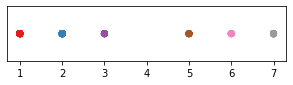

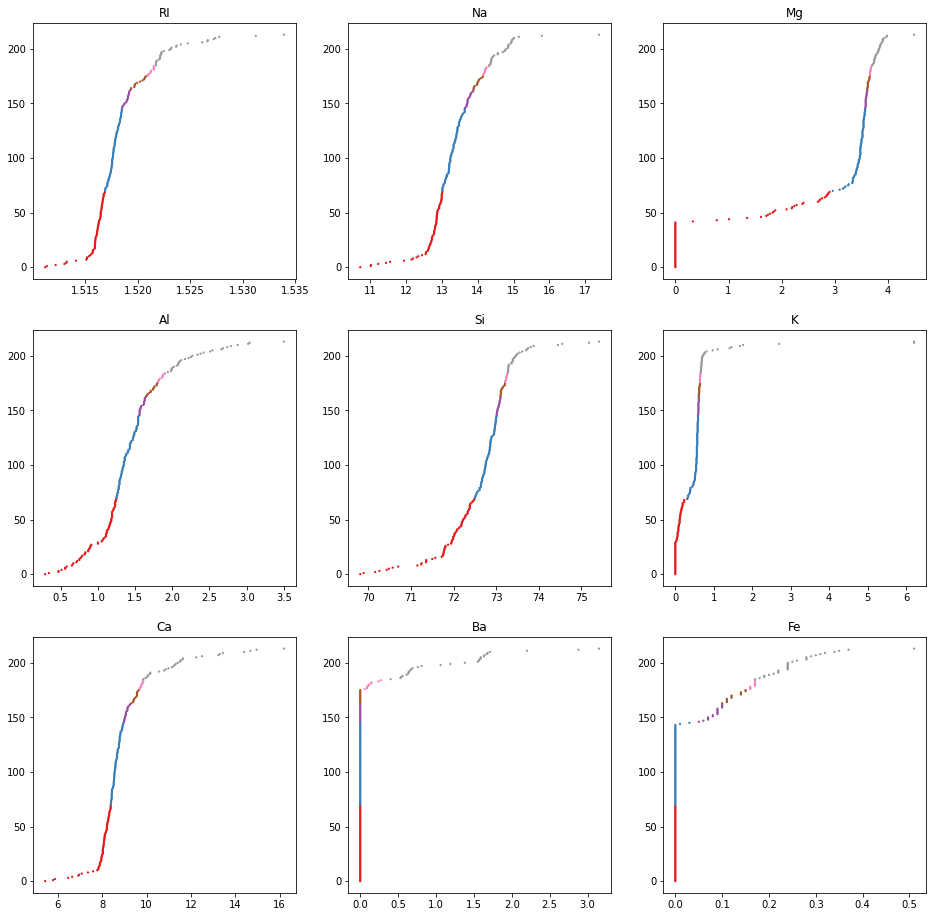

In [2]:
df = pd.read_csv('glass.csv')

var_names = list(df.drop(columns=["Type"]).columns)

labels = df.to_numpy('int')[:,-1]
data   = df.to_numpy('float')[:,:-1]

plt.figure(figsize=(5, 1))
plt.tick_params(axis="y", which="both", right=False, left=False, labelleft=False)
plt.scatter(labels, [0]*len(labels), c=labels, cmap="Set1")
plt.show()

fig, axs = plt.subplots(3, 3, figsize=(16, 16))
for i in range(9):
    axs[i // 3, i % 3].scatter(np.sort(data[:,i]), range(data[:, i].size), c=labels, s=1.5, cmap='Set1')
    axs[i // 3, i % 3].set_title(var_names[i])
plt.show()

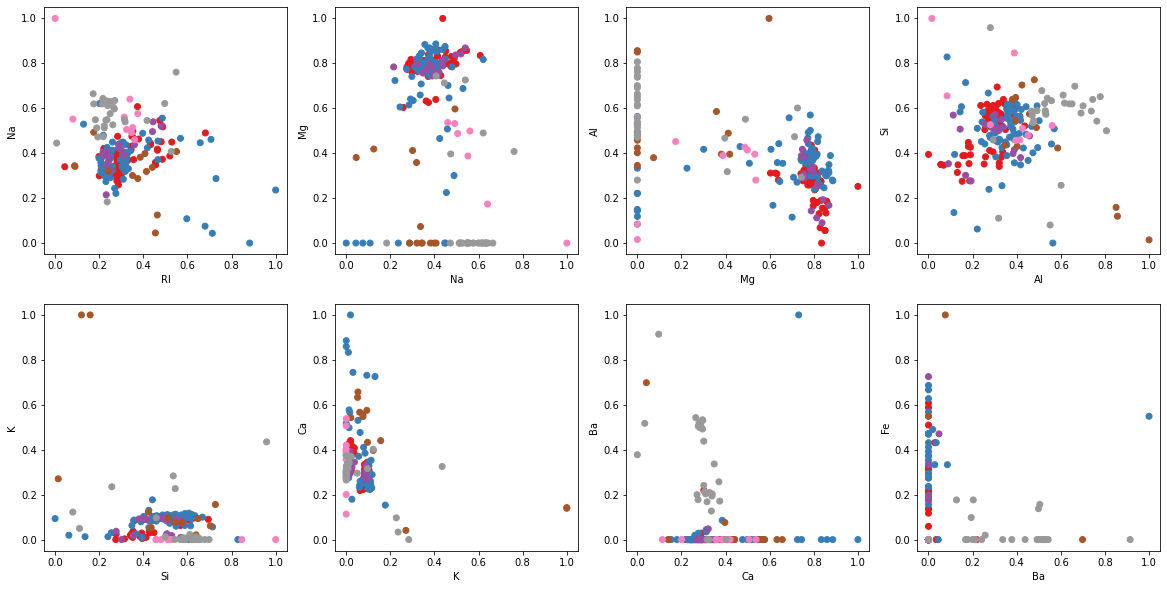

In [3]:
data = preprocessing.minmax_scale(data)
common_variance = pd.DataFrame(data).var().sum()
scatter_data(data)

#### Метод главных компонент

In [4]:
pca = PCA(n_components = 9)
pca_data = pca.fit_transform(data)

cumulative_explained_variance = pca.explained_variance_ratio_.copy() * 100
for i in range(1, len(cumulative_explained_variance)):
    cumulative_explained_variance[i] += cumulative_explained_variance[i-1]

pd.DataFrame({
    "explained variance ratio": pca.explained_variance_ratio_,
    "cumulative variance ratio": cumulative_explained_variance,
    "singular values": pca.singular_values_
}).T


,0,1,2,3,4,5,6,7,8
explained variance ratio,0.454296,0.179901,0.126495,0.097978,0.068624,0.042141,0.026098,0.004328,0.000139
cumulative variance ratio,45.429569,63.419666,76.069126,85.866973,92.729371,96.943472,99.553262,99.986059,100.000000
singular values,5.104931,3.212457,2.693745,2.370751,1.984077,1.554795,1.223555,0.498267,0.089428


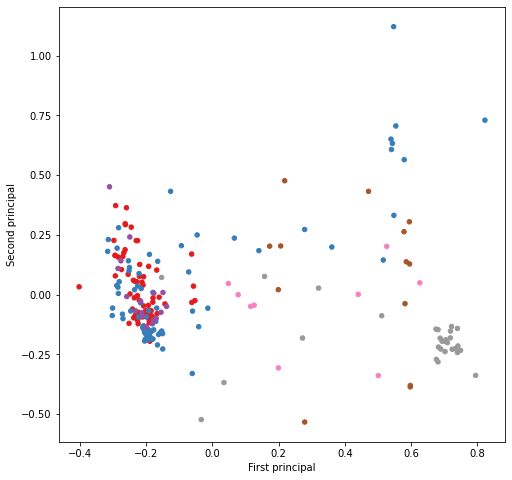

In [5]:
plt.figure(figsize=(8, 8))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, s=20, cmap='Set1')
plt.xlabel('First principal')
plt.ylabel('Second principal')
plt.show()

In [6]:
pca2 = PCA(n_components=4)
pca2_data = pca2.fit_transform(data)

recovered_data = pca2.inverse_transform(pca2_data)
pd.concat([
    pd.DataFrame(data,           columns=var_names).var(),
    pd.DataFrame(recovered_data, columns=var_names).var(),
], axis=1, keys=["data var", "recovered data var"]).T


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
data var,0.017772,0.015079,0.103201,0.024191,0.019130,0.011030,0.017494,0.024916,0.036503
recovered data var,0.016902,0.004732,0.102760,0.018471,0.016811,0.001918,0.016578,0.017499,0.035582


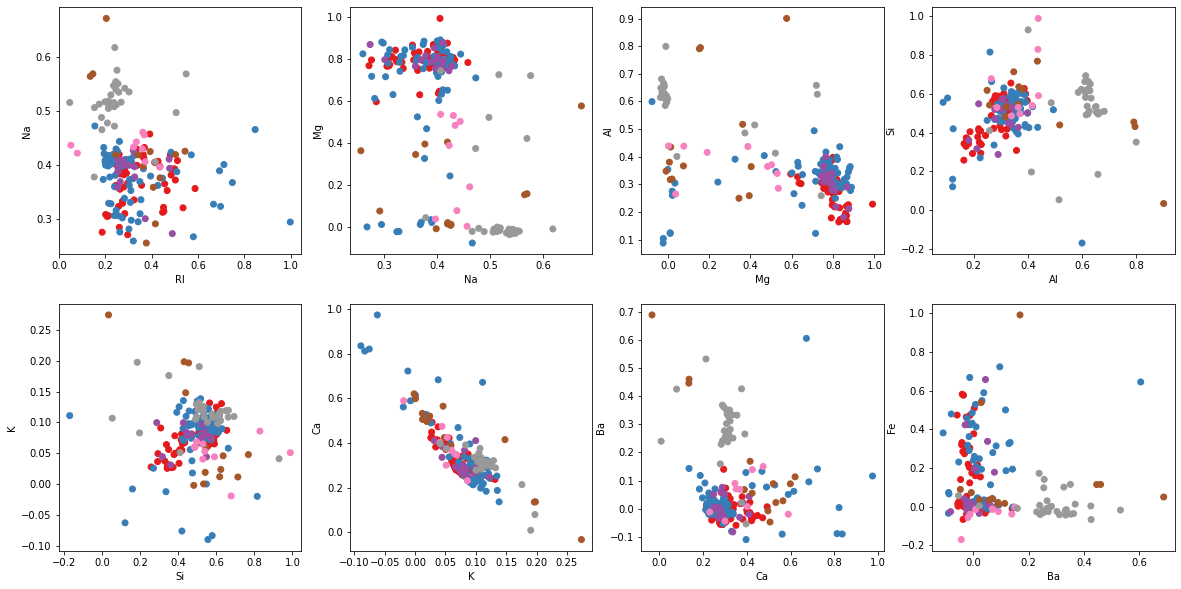

In [7]:
scatter_data(recovered_data)

In [8]:
def analyze_solver(n_components, solver):
    pca = PCA(n_components=n_components, svd_solver=solver)
    pca_data = pca.fit_transform(data)

    cumulative_explained_variance = pca.explained_variance_ratio_.copy() * 100
    for i in range(1, len(cumulative_explained_variance)):
        cumulative_explained_variance[i] += cumulative_explained_variance[i-1]

    print(pd.DataFrame({
        "explained variance ratio": pca.explained_variance_ratio_,
        "singular values": pca.singular_values_
    }).T)

    recovered_data = pca.inverse_transform(pca_data)
    return pd.concat([
        pd.DataFrame(data,           columns=var_names).var(),
        pd.DataFrame(recovered_data, columns=var_names).var(),
    ], axis=1, keys=["data var", "recovered data var"]).T

def draw_solver(n_components, solver, axs):
    pca = PCA(n_components=n_components, svd_solver=solver)
    pca_data = pca.fit_transform(data)

    if axs is not None:
        axs.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, s=20, cmap='Set1')
        axs.set_xlabel('First principal')
        axs.set_ylabel('Second principal')
        axs.set_title(solver)

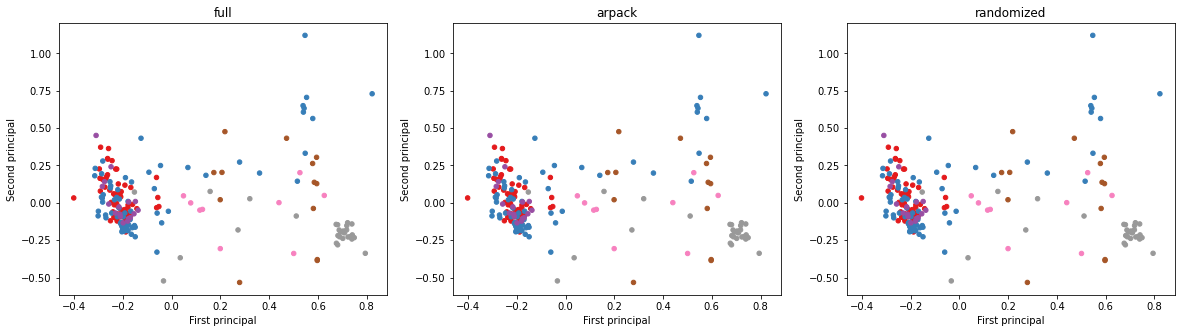

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
draw_solver(4, "full", axs[0])
draw_solver(4, "arpack", axs[1])
draw_solver(4, "randomized", axs[2])


In [10]:
analyze_solver(4, "full")

                                 0         1         2         3
explained variance ratio  0.454296  0.179901  0.126495  0.097978
singular values           5.104931  3.212457  2.693745  2.370751


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
data var,0.017772,0.015079,0.103201,0.024191,0.019130,0.011030,0.017494,0.024916,0.036503
recovered data var,0.016902,0.004732,0.102760,0.018471,0.016811,0.001918,0.016578,0.017499,0.035582


In [11]:
analyze_solver(4, "arpack")

                                 0         1         2         3
explained variance ratio  0.454296  0.179901  0.126495  0.097978
singular values           5.104931  3.212457  2.693745  2.370751


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
data var,0.017772,0.015079,0.103201,0.024191,0.019130,0.011030,0.017494,0.024916,0.036503
recovered data var,0.016902,0.004732,0.102760,0.018471,0.016811,0.001918,0.016578,0.017499,0.035582


In [12]:
analyze_solver(4, "randomized")

                                 0         1         2         3
explained variance ratio  0.454296  0.179901  0.126495  0.097978
singular values           5.104931  3.212457  2.693745  2.370751


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
data var,0.017772,0.015079,0.103201,0.024191,0.019130,0.011030,0.017494,0.024916,0.036503
recovered data var,0.016902,0.004732,0.102760,0.018471,0.016811,0.001918,0.016578,0.017499,0.035582


#### Модификация метода главных компонент

In [13]:
def draw_kernel_pca(axs, plot_name, kernel_pca_data):
    axs.scatter(kernel_pca_data[:, 0], kernel_pca_data[:, 1], c=labels, cmap='Set1')
    axs.set_title(plot_name)
    axs.set_xlabel('First principal')
    axs.set_ylabel('Second principal')


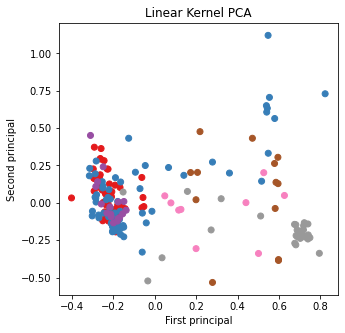

,1,2,3,4,explained
linear,26.060318,10.319879,7.256264,5.620459,0.85867


In [14]:
linear_kernel_pca = KernelPCA(n_components=4, kernel="linear")
linear_kpca_ev = KernelPCA(n_components=data.shape[1], kernel="linear").fit(data).lambdas_
linear_kernel_pca_data = linear_kernel_pca.fit_transform(data)

plt.figure(figsize=(5, 5))
plt.scatter(linear_kernel_pca_data[:, 0], linear_kernel_pca_data[:, 1], c=labels, cmap="Set1")
plt.title("Linear Kernel PCA")
plt.xlabel("First principal")
plt.ylabel("Second principal")
plt.show()

pd.DataFrame({
    "linear": np.append(linear_kernel_pca.lambdas_, linear_kernel_pca.lambdas_.sum() / linear_kpca_ev.sum()),
}, index=[1, 2, 3, 4, "explained"]).T


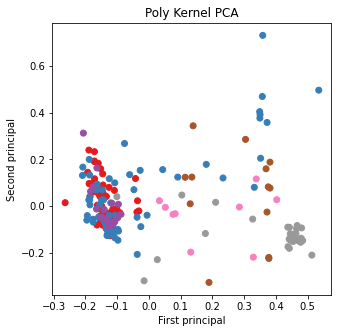

In [15]:
poly_kernel_pca     = KernelPCA(n_components=4, kernel="poly")
poly_kernel_pca_g1  = KernelPCA(n_components=4, kernel="poly", gamma=1)
poly_kernel_pca_g05 = KernelPCA(n_components=4, kernel="poly", gamma=0.5)
poly_kernel_pca_d1  = KernelPCA(n_components=4, kernel="poly", degree=1)
poly_kernel_pca_d4  = KernelPCA(n_components=4, kernel="poly", degree=4)
poly_kernel_pca_c0  = KernelPCA(n_components=4, kernel="poly", coef0=0)
poly_kernel_pca_c10 = KernelPCA(n_components=4, kernel="poly", coef0=10)

poly_kpca_ev     = KernelPCA(n_components=data.shape[1], kernel="poly").fit(data).lambdas_
poly_kpca_ev_g1  = KernelPCA(n_components=data.shape[1], kernel="poly", gamma=1).fit(data).lambdas_
poly_kpca_ev_g05 = KernelPCA(n_components=data.shape[1], kernel="poly", gamma=0.5).fit(data).lambdas_
poly_kpca_ev_d1  = KernelPCA(n_components=data.shape[1], kernel="poly", degree=1).fit(data).lambdas_
poly_kpca_ev_d4  = KernelPCA(n_components=data.shape[1], kernel="poly", degree=4).fit(data).lambdas_
poly_kpca_ev_c0  = KernelPCA(n_components=data.shape[1], kernel="poly", coef0=0).fit(data).lambdas_
poly_kpca_ev_c10 = KernelPCA(n_components=data.shape[1], kernel="poly", coef0=10).fit(data).lambdas_

poly_kernel_pca_data = poly_kernel_pca.fit_transform(data)
plt.figure(figsize=(5, 5))
plt.scatter(poly_kernel_pca_data[:, 0], poly_kernel_pca_data[:, 1], c=labels, cmap="Set1")
plt.title("Poly Kernel PCA")
plt.xlabel("First principal")
plt.ylabel("Second principal")
plt.show()


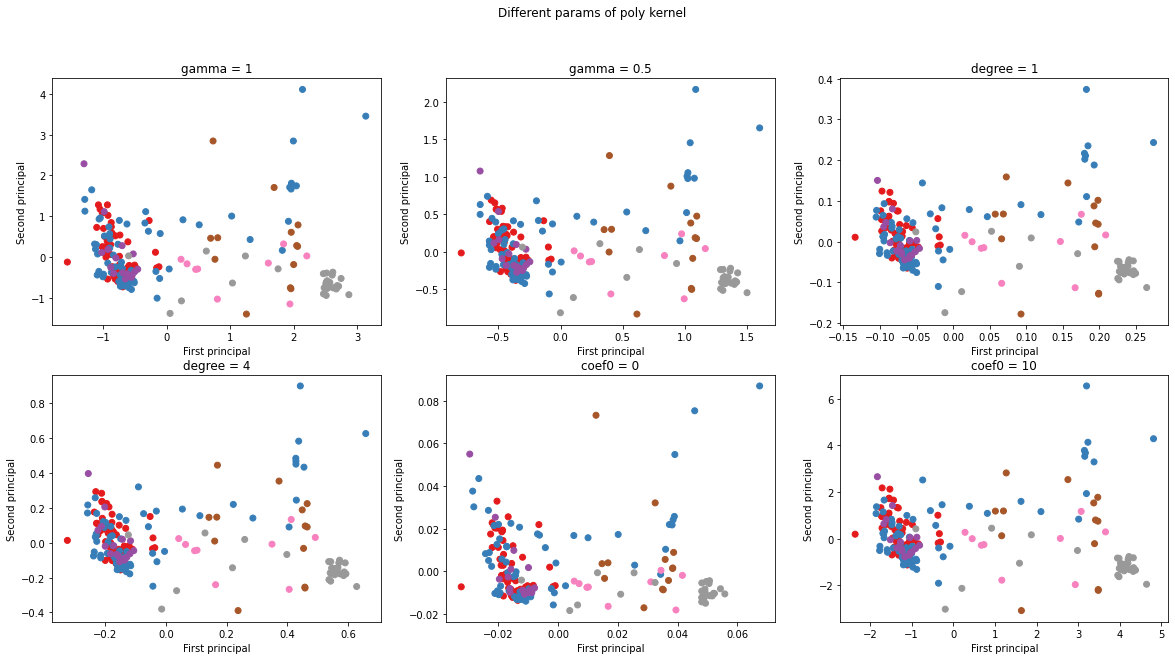

,1,2,3,4,explained
default,10.918196,4.319377,3.118851,2.367917,0.849032
gamma = 1,344.004959,139.713954,108.149960,77.611329,0.803165
gamma = 0.5,93.580987,37.372218,28.330788,20.680771,0.821348
degree = 1,2.895591,1.146653,0.806252,0.624495,0.858670
degree = 4,16.329092,6.467189,4.727374,3.555738,0.842860
coef0 = 0,0.131363,0.058304,0.045710,0.033413,0.762103
coef0 = 10,889.810298,352.277001,248.452475,192.015368,0.857763


In [16]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle("Different params of poly kernel", fontsize="large")

poly_data = {
    "gamma = 1":   poly_kernel_pca_g1.fit_transform(data),
    "gamma = 0.5": poly_kernel_pca_g05.fit_transform(data),
    "degree = 1":  poly_kernel_pca_d1.fit_transform(data),
    "degree = 4":  poly_kernel_pca_d4.fit_transform(data),
    "coef0 = 0":   poly_kernel_pca_c0.fit_transform(data),
    "coef0 = 10":  poly_kernel_pca_c10.fit_transform(data)
}
for i, (name, pca_data) in enumerate(poly_data.items()):
    draw_kernel_pca(axs[i//3, i%3], name, pca_data)

plt.show()

pd.DataFrame({
    "default":     np.append(poly_kernel_pca.lambdas_,     poly_kernel_pca.lambdas_.sum()     / poly_kpca_ev.sum()),
    "gamma = 1":   np.append(poly_kernel_pca_g1.lambdas_,  poly_kernel_pca_g1.lambdas_.sum()  / poly_kpca_ev_g1.sum()),
    "gamma = 0.5": np.append(poly_kernel_pca_g05.lambdas_, poly_kernel_pca_g05.lambdas_.sum() / poly_kpca_ev_g05.sum()),
    "degree = 1":  np.append(poly_kernel_pca_d1.lambdas_,  poly_kernel_pca_d1.lambdas_.sum()  / poly_kpca_ev_d1.sum()),
    "degree = 4":  np.append(poly_kernel_pca_d4.lambdas_,  poly_kernel_pca_d4.lambdas_.sum()  / poly_kpca_ev_d4.sum()),
    "coef0 = 0":   np.append(poly_kernel_pca_c0.lambdas_,  poly_kernel_pca_c0.lambdas_.sum()  / poly_kpca_ev_c0.sum()),
    "coef0 = 10":  np.append(poly_kernel_pca_c10.lambdas_, poly_kernel_pca_c10.lambdas_.sum() / poly_kpca_ev_c10.sum())
}, index=[1, 2, 3, 4, "explained"]).T


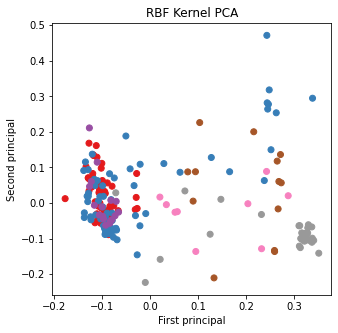

In [17]:
rbf_kernel_pca     = KernelPCA(n_components=4, kernel="rbf")
rbf_kernel_pca_g1  = KernelPCA(n_components=4, kernel="rbf", gamma=1)
rbf_kernel_pca_g05 = KernelPCA(n_components=4, kernel="rbf", gamma=0.5)

rbf_kpca_ev        = KernelPCA(n_components=data.shape[1], kernel="rbf").fit(data).lambdas_
rbf_kpca_ev_g1     = KernelPCA(n_components=data.shape[1], kernel="rbf", gamma=1).fit(data).lambdas_
rbf_kpca_ev_g05    = KernelPCA(n_components=data.shape[1], kernel="rbf", gamma=0.5).fit(data).lambdas_

rbf_kernel_pca_data = rbf_kernel_pca.fit_transform(data)
plt.figure(figsize=(5, 5))
plt.scatter(rbf_kernel_pca_data[:, 0], rbf_kernel_pca_data[:, 1], c=labels, cmap="Set1")
plt.title("RBF Kernel PCA")
plt.xlabel("First principal")
plt.ylabel("Second principal")
plt.show()

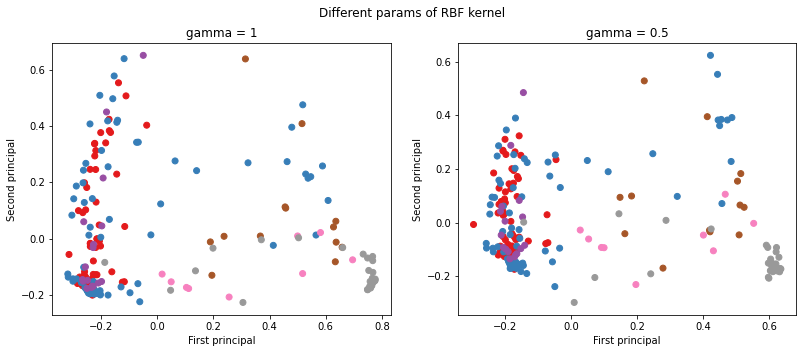

,1,2,3,4,explained
default,5.351453,2.018054,1.495738,1.110905,0.849938
gamma = 1,28.217500,9.985555,8.079237,5.530154,0.816641
gamma = 0.5,18.713311,6.434521,5.347800,3.647029,0.826683


In [18]:
fig, axs = plt.subplots(1, 2, figsize=(13.33, 5))
fig.suptitle("Different params of RBF kernel", fontsize="large")

rbf_data = {
    "gamma = 1":   rbf_kernel_pca_g1.fit_transform(data),
    "gamma = 0.5": rbf_kernel_pca_g05.fit_transform(data),
}
for i, (name, pca_data) in enumerate(rbf_data.items()):
    draw_kernel_pca(axs[i], name, pca_data)

plt.show()

pd.DataFrame({
    "default":     np.append(rbf_kernel_pca.lambdas_,     rbf_kernel_pca.lambdas_.sum()     / rbf_kpca_ev.sum()),
    "gamma = 1":   np.append(rbf_kernel_pca_g1.lambdas_,  rbf_kernel_pca_g1.lambdas_.sum()  / rbf_kpca_ev_g1.sum()),
    "gamma = 0.5": np.append(rbf_kernel_pca_g05.lambdas_, rbf_kernel_pca_g05.lambdas_.sum() / rbf_kpca_ev_g05.sum()),
}, index=[1, 2, 3, 4, "explained"]).T

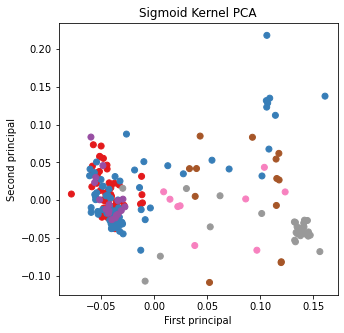

In [19]:
sigmoid_kernel_pca     = KernelPCA(n_components=4, kernel="sigmoid")
sigmoid_kernel_pca_g1  = KernelPCA(n_components=4, kernel="sigmoid", gamma=1)
sigmoid_kernel_pca_g05 = KernelPCA(n_components=4, kernel="sigmoid", gamma=0.5)
sigmoid_kernel_pca_c0  = KernelPCA(n_components=4, kernel="sigmoid", coef0=0)
sigmoid_kernel_pca_c10 = KernelPCA(n_components=4, kernel="sigmoid", coef0=10)

sigmoid_kpca_ev     = KernelPCA(n_components=data.shape[1], kernel="sigmoid").fit(data).lambdas_
sigmoid_kpca_ev_g1  = KernelPCA(n_components=data.shape[1], kernel="sigmoid", gamma=1).fit(data).lambdas_
sigmoid_kpca_ev_g05 = KernelPCA(n_components=data.shape[1], kernel="sigmoid", gamma=0.5).fit(data).lambdas_
sigmoid_kpca_ev_c0  = KernelPCA(n_components=data.shape[1], kernel="sigmoid", coef0=0).fit(data).lambdas_
sigmoid_kpca_ev_c10 = KernelPCA(n_components=data.shape[1], kernel="sigmoid", coef0=10).fit(data).lambdas_

sigmoid_kernel_pca_data = sigmoid_kernel_pca.fit_transform(data)
plt.figure(figsize=(5, 5))
plt.scatter(sigmoid_kernel_pca_data[:, 0], sigmoid_kernel_pca_data[:, 1], c=labels, cmap="Set1")
plt.title("Sigmoid Kernel PCA")
plt.xlabel("First principal")
plt.ylabel("Second principal")
plt.show()

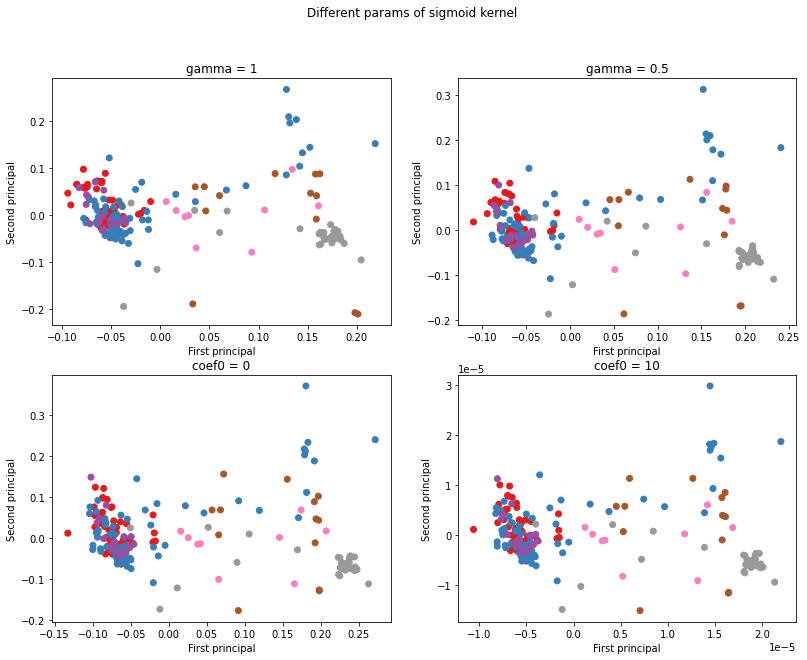

,1,2,3,4,explained
default,1.006181e+00,3.998375e-01,2.740985e-01,2.161195e-01,0.861865
gamma = 1,1.652027e+00,7.699351e-01,4.662115e-01,3.311741e-01,0.872191
gamma = 0.5,2.202103e+00,9.114499e-01,5.714274e-01,4.644157e-01,0.870135
coef0 = 0,2.852693e+00,1.129250e+00,7.910028e-01,6.142272e-01,0.859284
coef0 = 10,1.876208e-08,7.467428e-09,5.088428e-09,4.028215e-09,0.862512


In [20]:
fig, axs = plt.subplots(2, 2, figsize=(13.33, 10))
fig.suptitle("Different params of sigmoid kernel", fontsize="large")

sigmoid_data = {
    "gamma = 1":   sigmoid_kernel_pca_g1.fit_transform(data),
    "gamma = 0.5": sigmoid_kernel_pca_g05.fit_transform(data),
    "coef0 = 0":   sigmoid_kernel_pca_c0.fit_transform(data),
    "coef0 = 10":  sigmoid_kernel_pca_c10.fit_transform(data)
}
for i, (name, pca_data) in enumerate(sigmoid_data.items()):
    draw_kernel_pca(axs[i//2, i%2], name, pca_data)

plt.show()

pd.DataFrame({
    "default":     np.append(sigmoid_kernel_pca.lambdas_,     sigmoid_kernel_pca.lambdas_.sum()     / sigmoid_kpca_ev.sum()),
    "gamma = 1":   np.append(sigmoid_kernel_pca_g1.lambdas_,  sigmoid_kernel_pca_g1.lambdas_.sum()  / sigmoid_kpca_ev_g1.sum()),
    "gamma = 0.5": np.append(sigmoid_kernel_pca_g05.lambdas_, sigmoid_kernel_pca_g05.lambdas_.sum() / sigmoid_kpca_ev_g05.sum()),
    "coef0 = 0":   np.append(sigmoid_kernel_pca_c0.lambdas_,  sigmoid_kernel_pca_c0.lambdas_.sum()  / sigmoid_kpca_ev_c0.sum()),
    "coef0 = 10":  np.append(sigmoid_kernel_pca_c10.lambdas_, sigmoid_kernel_pca_c10.lambdas_.sum() / sigmoid_kpca_ev_c10.sum())
}, index=[1, 2, 3, 4, "explained"]).T

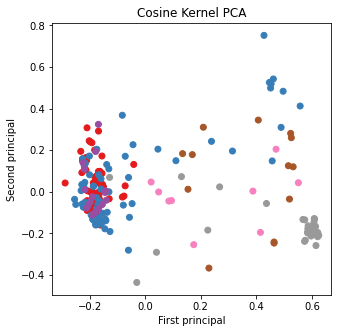

,1,2,3,4,explained
cosine,18.31403,6.475385,4.695999,3.578125,0.859944


In [21]:
cosine_kernel_pca = KernelPCA(n_components=4, kernel="cosine")
cosine_kpca_ev = KernelPCA(n_components=data.shape[1], kernel="cosine").fit(data).lambdas_
cosine_kernel_pca_data = cosine_kernel_pca.fit_transform(data)

plt.figure(figsize=(5, 5))
plt.scatter(cosine_kernel_pca_data[:, 0], cosine_kernel_pca_data[:, 1], c=labels, cmap="Set1")
plt.title("Cosine Kernel PCA")
plt.xlabel("First principal")
plt.ylabel("Second principal")
plt.show()

pd.DataFrame({
    "cosine": np.append(cosine_kernel_pca.lambdas_, cosine_kernel_pca.lambdas_.sum() / cosine_kpca_ev.sum()),
}, index=[1, 2, 3, 4, "explained"]).T

In [22]:
def draw_sparse_pca(axs, plot_name, sparse_pca_data):
    axs.scatter(sparse_pca_data[:, 0], sparse_pca_data[:, 1], c=labels, cmap='Set1')
    axs.set_title(plot_name)
    axs.set_xlabel('First principal')
    axs.set_ylabel('Second principal')

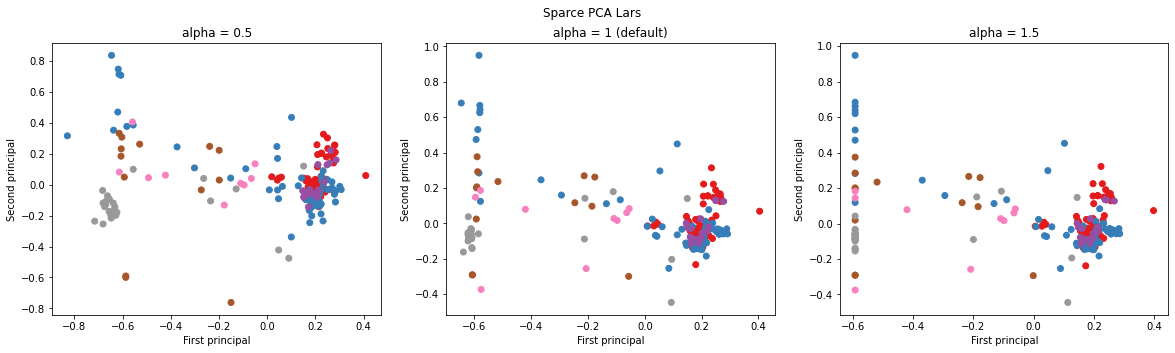

In [23]:
sparse_pca_lars     = SparsePCA(n_components=4, method="lars")
sparse_pca_lars_a05 = SparsePCA(n_components=4, method="lars", alpha=0.5)
sparse_pca_lars_a15 = SparsePCA(n_components=4, method="lars", alpha=1.5)

sparse_pca_lars_data = {
    "alpha = 0.5":         sparse_pca_lars_a05.fit_transform(data),
    "alpha = 1 (default)": sparse_pca_lars.fit_transform(data),
    "alpha = 1.5":         sparse_pca_lars_a15.fit_transform(data),
}

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle("Sparce PCA Lars")

for i, (name, sparse_data) in enumerate(sparse_pca_lars_data.items()):
    draw_sparse_pca(axs[i], name, sparse_data)

plt.show()

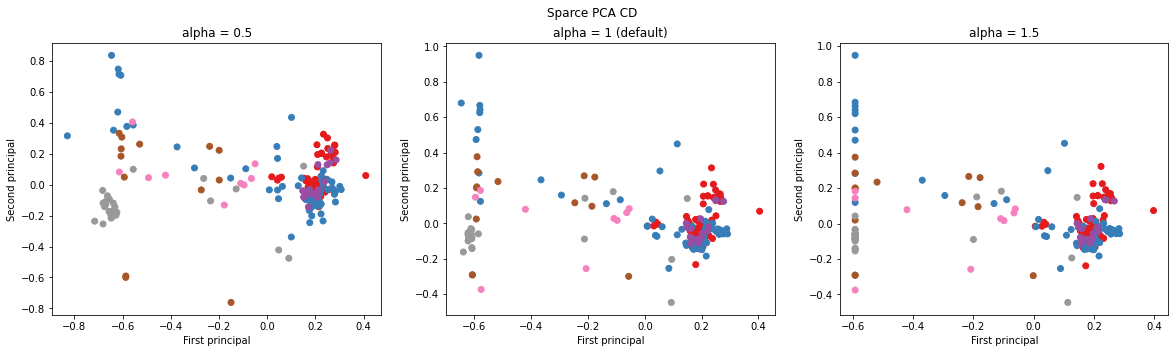

In [24]:
sparse_pca_cd       = SparsePCA(n_components=4, method="cd")
sparse_pca_cd_a05   = SparsePCA(n_components=4, method="cd", alpha=0.5)
sparse_pca_cd_a15   = SparsePCA(n_components=4, method="cd", alpha=1.5)

sparse_pca_cd_data = {
    "alpha = 0.5":         sparse_pca_cd_a05.fit_transform(data),
    "alpha = 1 (default)": sparse_pca_cd.fit_transform(data),
    "alpha = 1.5":         sparse_pca_cd_a15.fit_transform(data),
}

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle("Sparce PCA CD")

for i, (name, sparse_data) in enumerate(sparse_pca_cd_data.items()):
    draw_sparse_pca(axs[i], name, sparse_data)

plt.show()

#### Факторный анализ

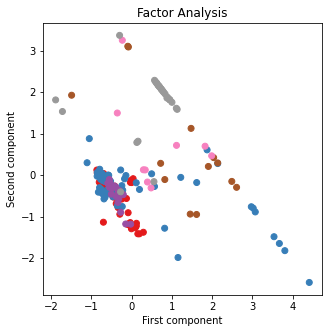

In [25]:
fa = FactorAnalysis(n_components=2)
fa_data = fa.fit_transform(data)

plt.figure(figsize=(5, 5))
plt.scatter(fa_data[:, 0], fa_data[:, 1], c=labels, cmap='Set1')
plt.title("Factor Analysis")
plt.xlabel('First component')
plt.ylabel('Second component')
plt.show()